In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, cm
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy import stats, polyval, polyfit
from pyxlsb import open_workbook as open_xlsb
from random import randint
import glob
plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])
plt.rcParams['axes.unicode_minus'] = False
from scipy.optimize import minimize
from scipy.optimize import basinhopping
from sklearn.kernel_ridge import KernelRidge
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error
from scipy.stats import norm
from scipy.stats import zscore

['NanumGothic']


In [2]:
mdata = pd.read_csv('tohj.csv')

NameError: name 'best_fit_coeffs' is not defined

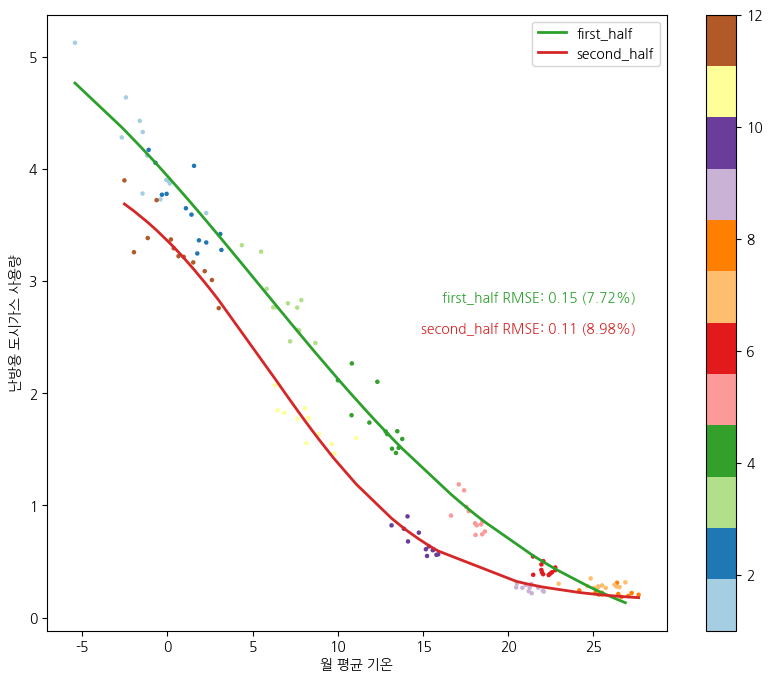

In [5]:
first_half = mdata.loc[(mdata['MM'] >=1 ) & (mdata['MM'] <=7 )]
second_half= mdata.loc[(mdata['MM'] >=8 ) & (mdata['MM'] <=12 )]

def logistic_curve(x, a, b, c, d):
    return (a / (1 + np.exp(-c * (x - d)))) + b

# 실제 데이터
second_half = second_half.sort_values(by='average_temp')
x = second_half['average_temp']
y = second_half['평균난방공급량(m3)']/30

first_half_half = first_half.sort_values(by='average_temp')
xx = first_half['average_temp']
yy = first_half['평균난방공급량(m3)']/30

# Logistic curve fitting
ppot, pcov = curve_fit(logistic_curve, x, y, p0=[1000, 1, 1, 1])
yy_fitted = logistic_curve(x, *ppot)
rmse_logistic = np.sqrt(mean_squared_error(y, yy_fitted))

# 평균값 계산
mean_y = np.mean(y)
percentage_rmse_logistic = (rmse_logistic / mean_y) * 100 
# -----------------------------------
pppot, ppcov = curve_fit(logistic_curve, xx, yy, p0=[1000, 1, 1, 1])
yyy_fitted = logistic_curve(xx, *pppot)
rmse_logistic2 = np.sqrt(mean_squared_error(yy, yyy_fitted))

# 평균값 계산
mean_yy = np.mean(yy)
percentage_rmse_logistic2 = (rmse_logistic2 / mean_yy) * 100 



# 그래프 그리기
color_map = cm.get_cmap('Paired')
plt.figure(figsize=[10, 8])
#scc = plt.scatter(xx, yy,c=first_half.MM.values, cmap=color_map, s=5)
plt.plot(np.sort(xx), logistic_curve(np.sort(xx), *pppot), label='first_half', color='C2', ls='-', linewidth=2)
#sc = plt.scatter(x, y,c=second_half.MM.values, cmap=color_map, s=5)
plt.plot(np.sort(x), logistic_curve(np.sort(x), *ppot), label='second_half', color='C3', ls='-', linewidth=2)
sc = plt.scatter(mdata['average_temp'], mdata['평균난방공급량(m3)']/30,c=mdata.MM.values, cmap=color_map, s=5)
plt.colorbar(sc)


plt.ylabel('난방용 도시가스 사용량')
plt.xlabel('월 평균 기온')

# RMSE 및 백분율 RMSE 텍스트 추가

rmse_text_logistic = f'second_half RMSE: {rmse_logistic:.2f} ({percentage_rmse_logistic:.2f}%)'
rmse_text_logistic2 = f'first_half RMSE: {rmse_logistic2:.2f} ({percentage_rmse_logistic2:.2f}%)'
plt.text(0.95, 0.5, rmse_text_logistic, transform=plt.gca().transAxes, ha='right', va='top', color='C3')
plt.text(0.95, 0.55, rmse_text_logistic2, transform=plt.gca().transAxes, ha='right', va='top', color='C2')

plt.legend()

# 가장 낮은 RMSE 모델의 회귀식 출력

best_fit_equation = f'y = {best_fit_coeffs}'
plt.text(0.95, -0.15, f'Best Fit: {best_fit_label} - {best_fit_equation}', transform=plt.gca().transAxes, va='bottom', color='black')



plt.show()

a, b, c, d = ppot
logistic_equation = f'y = ({a:.2f} / (1 + exp(-{c:.2f} * (x - {d:.2f})))) + {b:.2f}'
print("Logistic Regression Equation_second:", logistic_equation)

aa, bb, cc, dd = pppot
logistic_equation2 = f'y = ({aa:.2f} / (1 + exp(-{cc:.2f} * (x - {dd:.2f})))) + {bb:.2f}'
print("Logistic Regression Equation_first:", logistic_equation2)